# Module 3 Peer Review Assignment

# Problem 1

You work at a factory that manufactures light bulbs. You have determined that $5\%$ of light bulbs that are produced are defective. For each of the scenarios below:

1. Define an appropriate random variable and distribution.
2. State the values that the random variable can take on.
3. State any assumptions that you need to make.
4. Find the probability that the random variable you defined takes on the value $X=4$.

**Part a)**

Out of 30 lightbulbs, $k$ are defective.

YOUR ANSWER HERE

1. binomial random variable - Binomial Distribution with parameters n=30 and p=0.05
2. it can take on any value from 0 - 30, inclusive
3. each lightbulb has a 5% chance of being defective, and each lightbulb is produced independent of other lightbulbs.
4. $ Px(4)= {30 \choose 4}  (0.05^4) (1-0.05)^{(30-4)} \approx .0451$

In [2]:
27405*0.00000625*0.26352009446

[1] 0.04513605

**Part b)**

You test each lightbulb as it comes of the line. The $k^{th}$ light bulb is the first defective light bulb you find.

1. geometric random variabel - geometric distribution. $X \sim Geo(0.05)$
2. k can be 0, 1, 2, ...
3. the production of each light bulb is independent from previous lightbulbs, and the probability of finding a defec tive light bulb is 0.05
4. $ P(X = 4) \sim Geo(0.05) \approx 0.04286875$


**Part c)**

You find your second defective light bulb after observing $k$ light bulbs in all.

1.  Negative Binomial distribution. $X \sim NB(2, 0.05)$
2. it can be any number greater to or equal to 2
3. the production of each light bulb is independent from previous lightbulbs, and the probability of finding a defec tive light bulb remains constant 
4. $P(X = 4) \sim NB(2,0.05) \approx 0.00677$

# Problem 2

Consider a loaded six-sided die that is twice as likely to roll an even number as an odd number. Let $X$ be random variable for value that is rolled from the die.

**Part a)**

What is the Probability Mass Function for $X$. Write this out as a table.

In [25]:
dice_prob <- function(x) {
  if (x %% 2 == 0) {
    return(2/9)
  } else {
    return(1/9)
  }
}

nums <- 1:6

pmf <- sapply(outcomes, dice_prob)

pmf_table <- data.frame(Outcome = nums, PMF = pmf)

pmf_table

Outcome,PMF
<int>,<dbl>
1,0.1111111
2,0.2222222
3,0.1111111
4,0.2222222
5,0.1111111
6,0.2222222


**Part b)**

What is the Cumulative Distribution Function for $X$?

In [26]:
F <- function(x) {
  if (x < 1) {
    return(0)
  } else if (x < 2) {
    return(1/3)
  } else if (x < 3) {
    return(5/9)
  } else if (x < 4) {
    return(7/9)
  } else if (x < 5) {
    return(23/27)
  } else {
    return(1)
  }
}

x <- 1:6
p <- sapply(x, F)
results <- data.frame(X = x, prob = p)

results$prob <- sprintf("%.2f%%", 100 * results$prob)

print(results)


  X    prob
1 1  33.33%
2 2  55.56%
3 3  77.78%
4 4  85.19%
5 5 100.00%
6 6 100.00%


**Part c)** 

What is $E[X]$?

33/9


# Problem 3

How would we simulate variables from these distributions in R? It'll turn out that the method is fairly similar across all these distributions so, for simplicity, let's just say we want to simulate $X \sim Bin(n,p)$. Take a look at the official documentation for this function [here](https://www.rdocumentation.org/packages/stats/versions/3.3/topics/Binomial). Not extremely clear, is it? Let's go through it one step at a time.

**Part a)** 

What if we want a random variable from this distribution? That is, we know some underlying distribution and we want to simulate many results from that distribution. Then we would use the "random generation" function `rbinom()`.

Play around with this function, with different `size` and `prob` parameters to get a feel for how it works. Finally, generate $30$ results from a $Bin(10, 0.3)$ distribution and plot a histogram of the results.

In [1]:
# YOUR CODE HERE

[1]  7  2  5  4  3  5 10  3  4  5  5  4  7  6  5  5  4  4  6  4  7  5  3  7  3
[26]  4  5  6  2  5

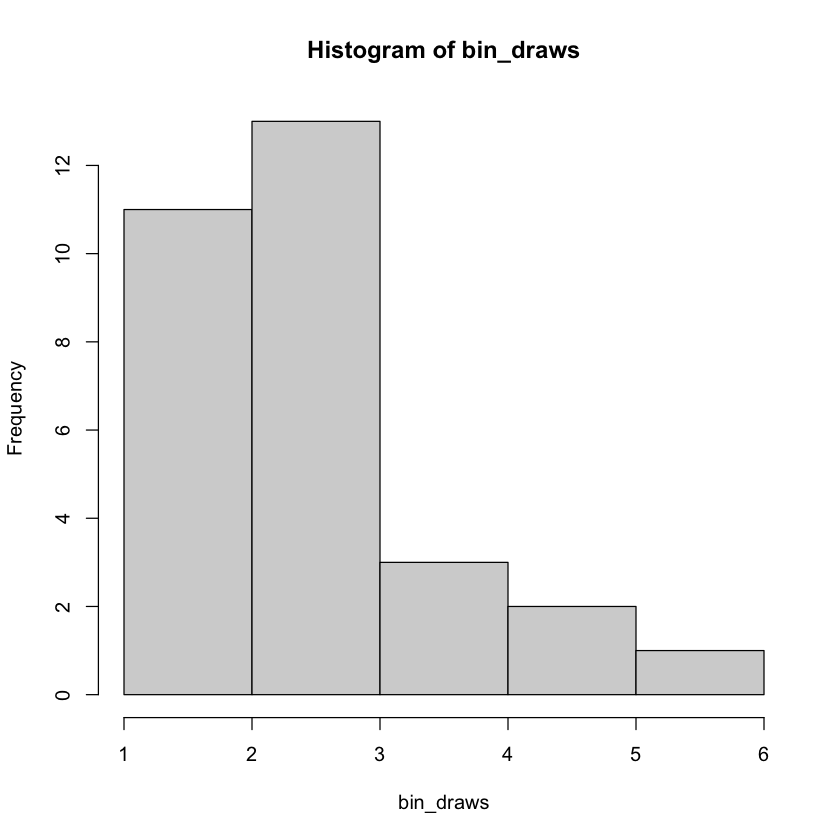

In [27]:
rbinom(30,10,0.5)
bin_draws <- rbinom(30,10,0.3)
hist(bin_draws)

**Part b)**

What if we have some value $k$ and we want to know what's probability of generating $k$? That is, we're solving the Probability Mass Function $P(X=k)$. Then we would use the "density" function `dbinom()`.

Let $X \sim Bin(15, 0.4)$. By hand, solve $P(X=4)$. Then use the `dbinom()` function to confirm your result.

YOUR ANSWER HERE

In [1]:
dbinom(4, 15, 0.4)

[1] 0.1267758

**Part c)**

What if we wanted to solve for some value of the Cumulative Density Function? That is, we know $k$ and want to find $P(X \le k) = p$. Then we would use the "distribution function" `pbinom()`.

Let $X \sim Bin(15, 0.4)$. By hand, solve $P(X \le 4)$. Then use the `pbinom()` function to confirm your result.

YOUR ANSWER HERE

In [2]:
pbinom(4, 15, 0.4)

[1] 0.2172777

**Part d)**

Finally, we have the "quantile" function `qbinom()`. This function is the reverse of the `pbinom()` function, in that it takes a probability $p$ as an argument and returns the value $k$ of the CDF that results in that much probability.

Use the `qbinom()` function to confirm your results from **Part c**. That is, plug in the probablity you got from **Part c** and see if you get the same $k$.

In [3]:
qbinom(0.21727, 15, 0.4)

[1] 4

Nearly every distribution has these four functions, and they will be very useful for our future calculations and simulations.